# Homework 2

Created by: Frendy

Date: 10/5/2020

The image folder has the images given for the homework

The output folder has the images that were created for the homework (Example: image1_crop.jpg)

# Dependencies

Please have the common libraries listed belowed installed.

In case you don't have it. Please install it by typing the following

## matplotlib
pip3 install matplotlib

## scipy
pip3 install scipy

## numpy
pip3 install numpy


In [1]:
############
# Numpy makes my computer run out of memory, fix it by forcing to not do multi threading
###########
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

In [2]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np

from PIL import Image

In [3]:
#########################
# Problem 4 a
#########################

def my_hist_equalization(gray_image, n_bins):
    
    #########
    # Original image
    ##########
    
    # Import image as numpy
    img = mpimg.imread(gray_image)
    npImg = np.array(img)
    npImg = npImg.flatten() # Make 1 D Array

    # Initialize histogram with size n_bins
    OriginalHistogram = np.zeros(n_bins)
    
    # Sum all pixels in a 256 array, to see intensity
    for i in npImg:
        OriginalHistogram[i] = OriginalHistogram[i] + 1
   
    #########
    # HIstogram Equalization
    ##########
    # Cumulative sum first
    OriginalHistogram = iter(OriginalHistogram)
    
    # make a new numpy arrray
    csArray = [next(OriginalHistogram)]
    for i in OriginalHistogram:
        csArray.append(csArray[-1] + i)
    
    csArray = np.array(csArray)
    
    # Normalize cum sum
    csNormalize = (csArray -csArray.min())/(csArray.max() - csArray.min())
    
    #Output
    # Make 1D array into a 2D array of same shape as img
    OutputImg = np.reshape(csNormalize[npImg], img.shape)
    
    # Since after normalizing, hisogram intesity is from 0->1
    # The example histogram after equalizing is 0 -> 256 
    # So to make it similar I multiply it by 256
    OutputHistogram = OutputImg.flatten() * 256
    
    #################
    # Display graphs and histogram
    #################
    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(20)
    
    # Original
    # Image
    fig.add_subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('Original image')

    #Histogram
    fig.add_subplot(2,2,2)
    plt.hist(npImg, bins=n_bins)
    plt.title('Histogram of original image')
    plt.xlabel('Itensity value')
    plt.ylabel('Frequency')
    plt.xlim([0,270])
    
    # Histogram equalization
    # Image
    fig.add_subplot(2,2,3)
    plt.imshow(OutputImg, cmap='gray')
    plt.title('Histogram equalization')

    #Histogram
    fig.add_subplot(2,2,4)
    plt.hist(OutputHistogram, bins=n_bins)
    plt.title('Histogram after equalization')
    plt.xlabel('Itensity value')
    plt.ylabel('Frequency')
    plt.xlim([0,270])
    
    return OutputImg
        

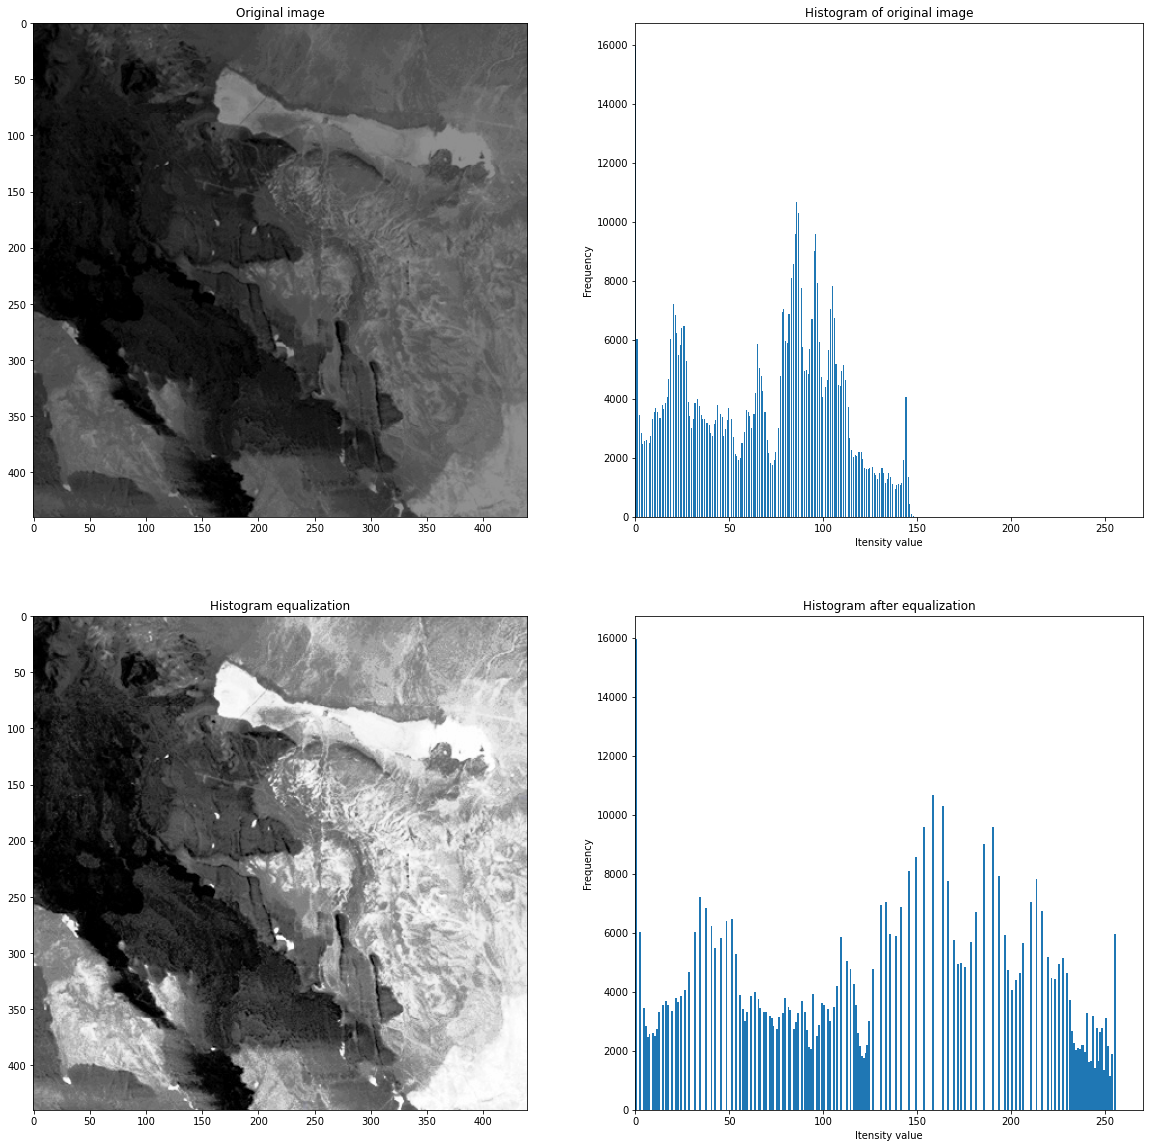

In [4]:
#########################
# Problem 4 b
#########################
Output = my_hist_equalization('images/landsat.jpg', 256)


Saving landsat_hist_equalized.jpg


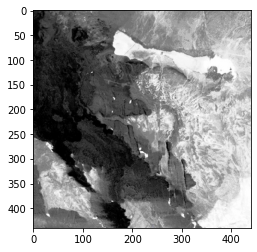

In [5]:
#########################
# Problem 4 c
#########################
plt.imshow(Output)
print("Saving landsat_hist_equalized.jpg")
plt.savefig('output/landsat_hist_equalized.jpg')
plt.show()

In [6]:
#########################
# Problem 5 a
#########################

def contrast_stretch(gray_image):
    
    #########
    # Original image
    ##########
    
    # Import image as numpy
    img = mpimg.imread(gray_image)
    npImg = np.array(img)
    npImg = npImg.flatten() # Make 1 D Array

    #########
    # Contrast strech
    ##########
    # Intensity
    maxInt = npImg.max()
    minInt = npImg.min()
    
    # Do stretch
    a = 1/(maxInt - minInt)
    temp = (npImg - minInt)*a
    temp.astype('int')
    
    #Output
    # Make 1D array into a 2D array of same shape as img
    OutputImg = np.reshape(temp, img.shape)
    
    # Since after normalizing, hisogram intesity is from 0->1
    # The example histogram after equalizing is 0 -> 256 
    # So to make it similar I multiply it by 256
    OutputHistogram = OutputImg.flatten() * 256
    
    #################
    # Display graphs and histogram
    #################
    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(20)
    
    # Original
    # Image
    fig.add_subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('Original image')

    #Histogram
    fig.add_subplot(2,2,2)
    plt.hist(npImg, bins=256)
    plt.title('Histogram of original image')
    plt.xlabel('Itensity value')
    plt.ylabel('Frequency')
    plt.xlim([0,270])
    
    # Histogram equalization
    # Image
    fig.add_subplot(2,2,3)
    plt.imshow(OutputImg, cmap='gray')
    plt.title('Constrast Stretch')

    #Histogram
    fig.add_subplot(2,2,4)
    plt.hist(OutputHistogram, bins=256)
    plt.title('Histogram after Constrast Stretch')
    plt.xlabel('Itensity value')
    plt.ylabel('Frequency')
    plt.xlim([0,270])
    
    return OutputImg
        

'\n    We can observe that using Histogram equalizer makes the image brighter than constrast stretch. Thus, making it them slightly different.\n    \n    Histogram equalizer made the pixels from the original image be a cumulative distribution function of the intensity.\n    Constrast Stretching made the pixels fit the full range of intensity. This is made by multipling each intensity with a value.\n\n    To conclude, they look quite similar as they have the same purpose of enhance constrast.\n    However, if we look closely, the intensity are different as they are calculated in different ways.\n'

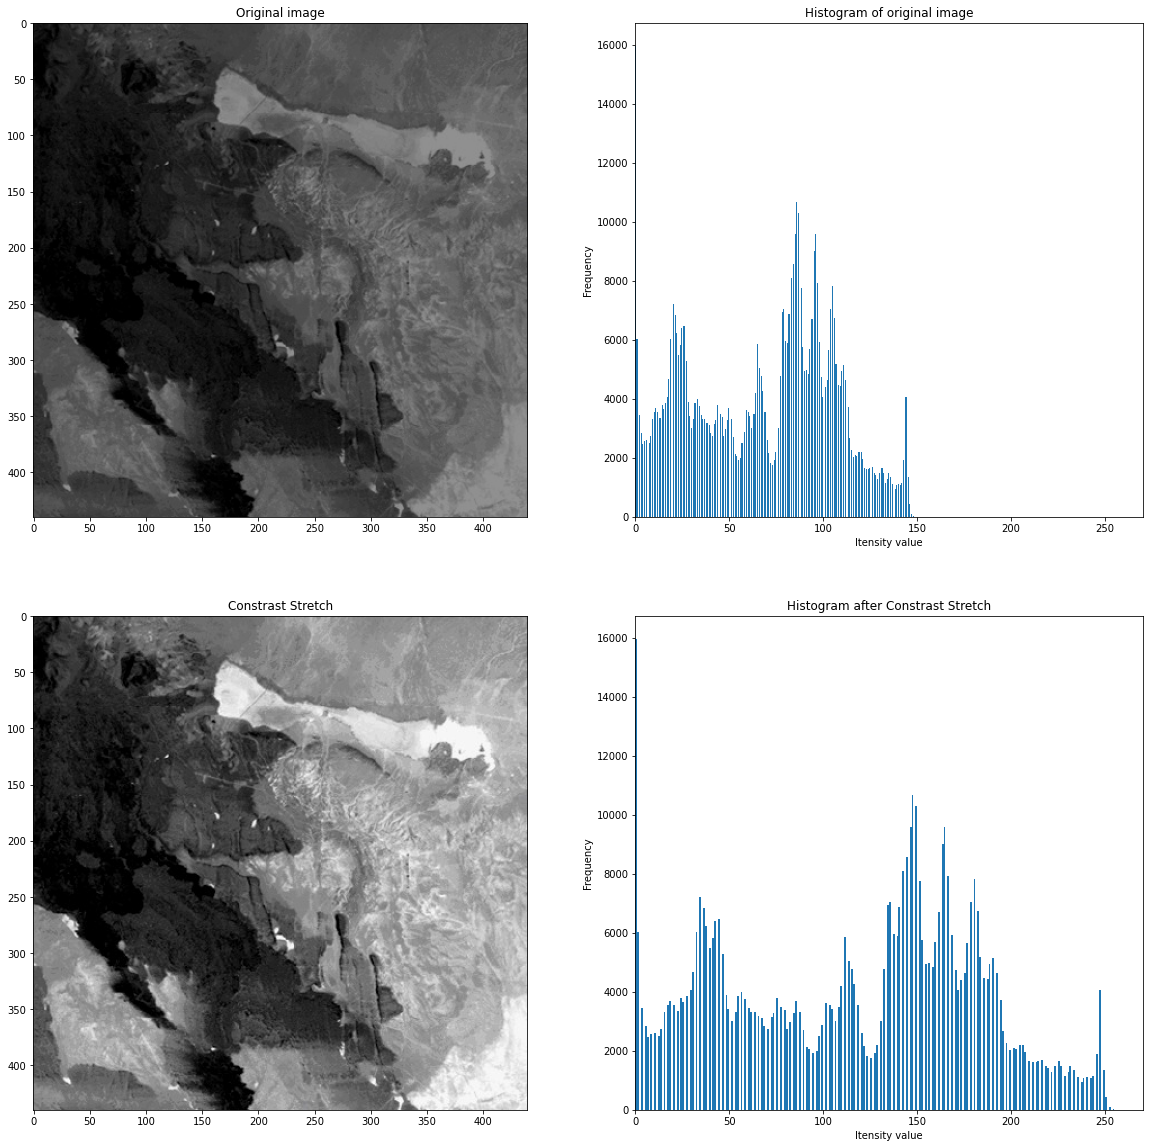

In [7]:
#########################
# Problem 5 b
#########################
Output = contrast_stretch('images/landsat.jpg')

###############
# Histogram equalizer vs Constrast Stretch
###############
'''
    We can observe that using Histogram equalizer makes the image brighter than constrast stretch. Thus, making it them slightly different.
    
    Histogram equalizer made the pixels from the original image be a cumulative distribution function of the intensity.
    Constrast Stretching made the pixels fit the full range of intensity. This is made by multipling each intensity with a value.

    To conclude, they look quite similar as they have the same purpose of enhance constrast.
    However, if we look closely, the intensity are different as they are calculated in different ways.
'''

Saving landsat_stretched.jpg


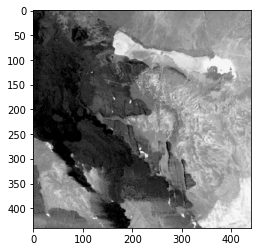

In [8]:
#########################
# Problem 5 c
#########################
plt.imshow(Output)
print("Saving landsat_stretched.jpg")
plt.savefig('output/landsat_stretched.jpg')
plt.show()

'\n    We hardly see any different as we are unable to stretch the intensity by a significant amount.\n    This is because the minIntensity and the maxIntensity are already in their minimun and maximun respectively.\n    The minIntensity of the image would be 0, and the maxIntensity would be 256.\n    When we plot the original image, we can observer that the intensity ranges from 0 to 256 already.\n    This means that we already reached the minIntensity and maxIntensity.\n'

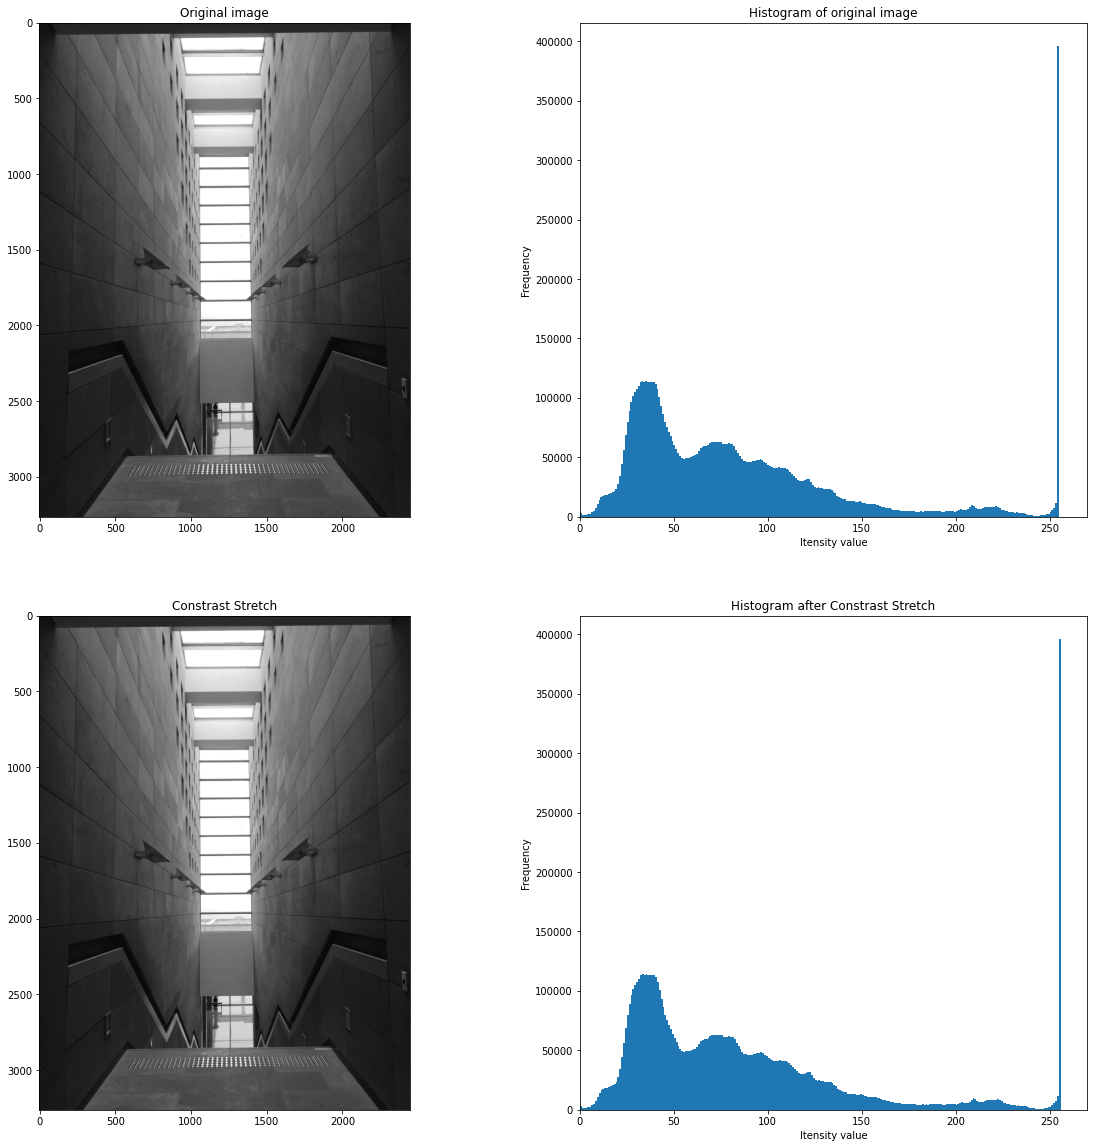

In [9]:
#########################
# Problem 5 d
#########################
Output = contrast_stretch('images/wall_gray.jpg')

'''
    We hardly see any different as we are unable to stretch the intensity by a significant amount.
    This is because the minIntensity and the maxIntensity are already in their minimun and maximun respectively.
    The minIntensity of the image would be 0, and the maxIntensity would be 256.
    When we plot the original image, we can observer that the intensity ranges from 0 to 256 already.
    This means that we already reached the minIntensity and maxIntensity.
'''

Saving wall_gray_stretched.jpg


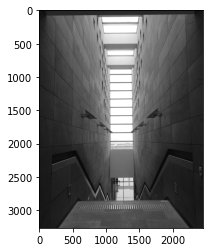

In [10]:
#########################
# Problem 5 e
#########################
plt.imshow(Output,cmap='gray')
print("Saving wall_gray_stretched.jpg")
plt.savefig('output/wall_gray_stretched.jpg')
plt.show()

In [11]:
#########################
# Problem 6 a
#########################

def my_convolution2d(gray_image, h):
    
    #########
    # Original image
    ##########
    
    # Import image as numpy
    img = mpimg.imread(gray_image)

    #########
    # my_convolution
    ##########
    x, y = img.shape
    m, n = h.shape

    #shift
    x = x - m + 1
    y = y - m + 1
    
    # Create Output with all Zeros
    OutputImg = np.zeros((x,y))
    
    # Zero padding
    # AKA not square
    if m != n:
        if m > n:
            tempH = np.zeros([m,m])
        elif n > m:
            tempH = np.zeros([n,n])
        
        # Fill existing h
        for i in range(m):
            for j in range(n):
                tempH[i][j] = h[i][j]
        
        h = tempH
        
    # H should be good here
    
    # Convolution ! Need to flipperino x and y axis
    np.fliplr(np.flipud(h))
    
    # Now do convolution! aka sumation
    for i in range(x):
        for j in range(y):
            OutputImg[i][j] = np.sum(img[i:i+m, j:j+m]*h)

    return OutputImg

'\n   We observe that if the size of the row of the filter is small, the image will not have modification/blurry.\n   The bigger the size of the row, the blurrier it gets.\n'

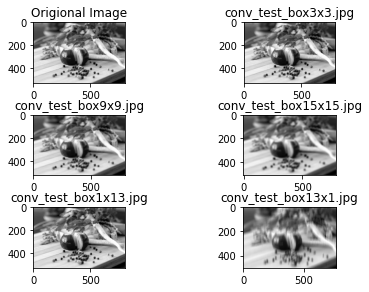

In [12]:
#########################
# Problem 6 b
#########################

#Box Filter aka a matrix with a bunch of 1
h3x3 = np.ones([3,3])
h9x9 = np.ones([9,9])
h15x15 = np.ones([15,15])
h1x13 = np.ones([1,13])
h13x1 = np.ones([31,1])

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout()

plt.subplot(3,2,1)
plt.imshow(mpimg.imread('images/conv_test.jpg'), cmap='gray')
plt.title('Origional Image', fontsize=12)

h = [h3x3, h9x9, h15x15, h1x13, h13x1]
name = ['3x3', '9x9', '15x15', '1x13', '13x1']
for k in range(len(h)):
    i = h[k]
    output = my_convolution2d('images/conv_test.jpg', i)
    if k == 0:
        plt.subplot(3,2,2)
    elif k == 1:
        plt.subplot(3,2,3)
    elif k == 2:
        plt.subplot(3,2,4)
    elif k == 3:
        plt.subplot(3,2,5) 
    else:
        plt.subplot(3,2,6)
    plt.imshow(output, cmap='gray') 
    plt.title('conv_test_box'+ name[k] + '.jpg')
    plt.imsave('output/conv_test_box'+ name[k] + '.jpg', output, cmap='gray') 

# for some reason 1x13 doesnt display :( in subplot)
# I displayed in the next cell just in case..

'''
   We observe that if the size of the row of the filter is small, the image will not have modification/blurry.
   The bigger the size of the row, the blurrier it gets.
'''    

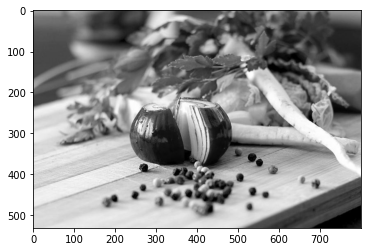

In [13]:
plt.imshow(mpimg.imread('output/conv_test_box1x13.jpg'), cmap='gray')
plt.show()


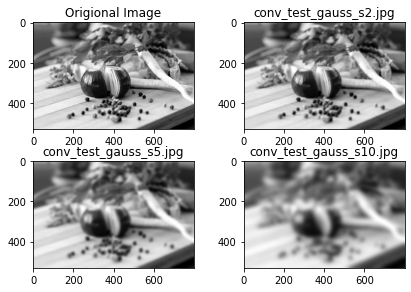

In [14]:
#########################
# Problem 6 c
#########################
from scipy.ndimage import gaussian_filter
#Box Filter aka a matrix with a bunch of 1
s = [2, 5,10]

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()

plt.subplot(2,2,1)
plt.imshow(mpimg.imread('images/conv_test.jpg'), cmap='gray')
plt.title('Origional Image', fontsize=12)

for k in range(len(s)):
    i = s[k]
    output = gaussian_filter(mpimg.imread('images/conv_test.jpg'), sigma = i)
    if k == 0:
        plt.subplot(2,2,2)
    elif k == 1:
        plt.subplot(2,2,3)
    else:
        plt.subplot(2,2,4)
    plt.imshow(output, cmap='gray')
    plt.title('conv_test_gauss_s'+ str(i) + '.jpg')
    plt.imsave('output/conv_test_gauss_s'+ str(i) + '.jpg', output, cmap='gray') 

